<div class="alert-info">
    <ul>
<li> Linear Discriminant Analysis or LDA is a dimensionality reduction technique. </li>
<li> LDA is a supervised classification technique </li>
<li> It is used as a pre-processing step </li>
<li> The goal of LDA is to project the features in higher dimensional space onto a lower-dimensional space.</li>
<li> LDA is a supervised classification technique </li>
        </ul>
</div>

<div class="alert-info">
The original technique was developed in the year 1936 by Ronald A. Fisher and was named Linear Discriminant or Fisher's Discriminant Analysis.
    
The original Linear Discriminant was described as a two-class technique. 

The multi-class version was later generalized by C.R Rao as Multiple Discriminant Analysis
</div>

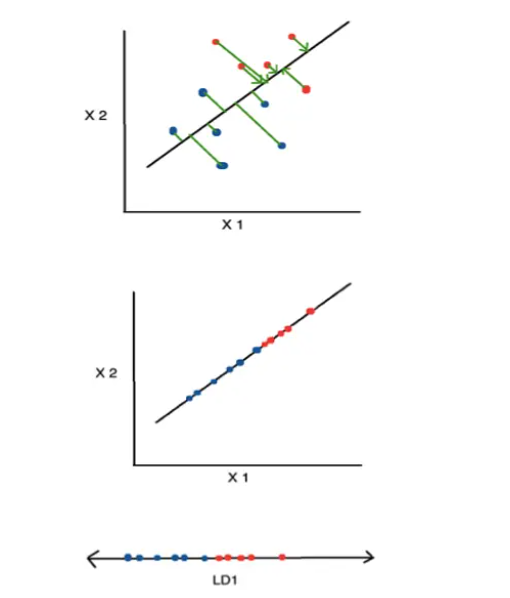

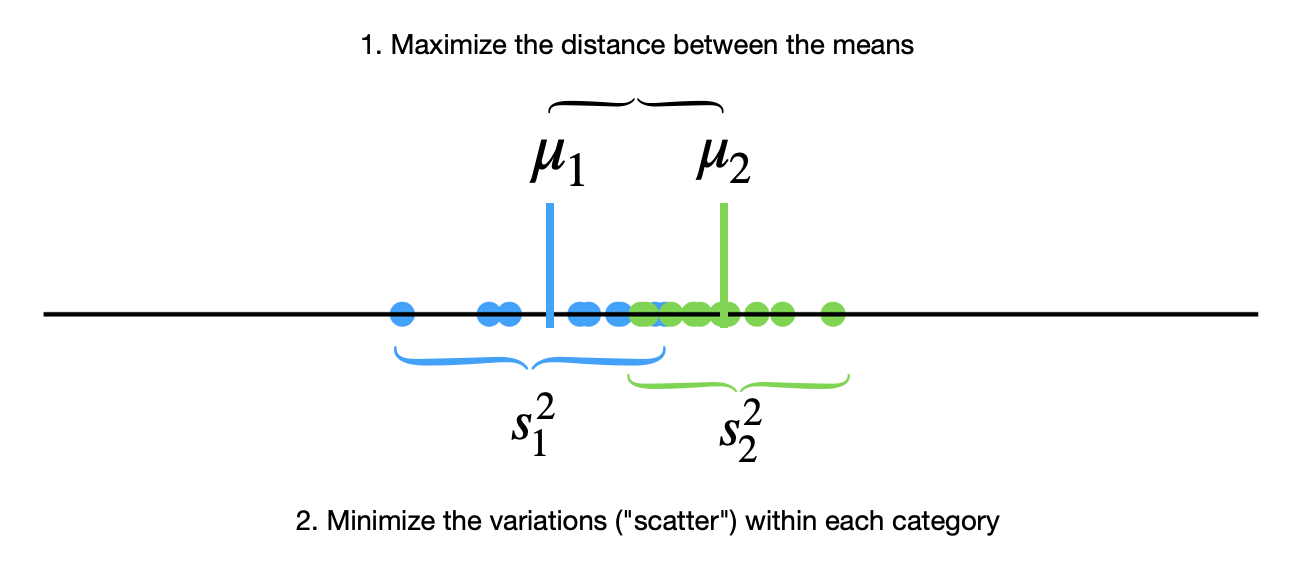

<div class="alert-info">  We can divide the process of Linear Discriminant Analysis into 5 steps as follows:
<ul>
<li>Step 1 - Computing the within-class </li> 

<li>step 2 - Computing between-class scatter matrices. </li> 

<li>Step 3 - Computing the eigenvectors and their corresponding eigenvalues for the scatter matrices. </li> 

<li>Step 4 - Sorting the eigenvalues and selecting the top k. </li> 

<li>Step 5 - Obtaining new features by taking the dot product of the data and the matrix from Step 4. </li> 
</ul>
</div>


In [1]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
np.set_printoptions(precision=4)
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
wine_info = load_wine()
X, y = wine_info.data, wine_info.target
X_df = pd.DataFrame(wine_info.data, columns=wine_info.feature_names)

In [3]:
X.shape, X_df.shape

((178, 13), (178, 13))

In [4]:
X_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [5]:

wine_info.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [6]:
n_features = X.shape[1] # create variable to store the domension of data
n_features

13

In [7]:
class_labels = np.unique(y) #The wine dataset contains three different kinds of wine
class_labels

array([0, 1, 2])

In [8]:
mean_overall = np.mean(X, axis=0)  # compute overall mean of the data set

SW = np.zeros((n_features, n_features)) # variables to store SW matrix
SB = np.zeros((n_features, n_features))  # variable to store SB matrix

mean_overall.shape

(13,)

<div class="alert-info"> Step 1 & Step 2 - Within-class scatter matrix </div>

In [9]:
for c in class_labels:
    X_class = X[y == c] # This will get data set for each class of y, so we have three data sets in X_c
    
    mean_class = np.mean(X_class, axis=0) # mean for data set with class 0,1,2
    SW += (X_class - mean_class).T.dot((X_class - mean_class))  # SW within class scatter matrix (Covariance matrix); 
                                                                # recall formula
    

    n_c = X_class.shape[0]
    mean_diff = (mean_class - mean_overall).reshape(n_features, 1) # class mean - overall mean
    SB += n_c * (mean_diff).dot(mean_diff.T)  # SB Between scatter class matrix
    
print(SB.shape)
print(SW.shape)

(13, 13)
(13, 13)


 ### Compute 
 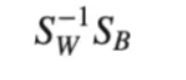

In [10]:
# Determine SW^-1 * SB
U = np.linalg.inv(SW).dot(SB)

<div class="alert-info"> Step 3 - Computing the eigenvectors and their corresponding eigenvalues for the scatter matrices </div>

In [11]:
# Get eigenvalues and eigenvectors of SW^-1 * SB
eigenvalues, eigenvectors = np.linalg.eig(U)
# -> eigenvector v = [:,i] column vector, transpose for easier calculations

eigenvectors = eigenvectors.T

<div class="alert-info"> Step 4  & 5 - Sorting the eigenvalues and selecting the top k. </div>


In [12]:
idxs = np.argsort(abs(eigenvalues))[::-1]
eigenvalues = eigenvalues[idxs]
eigenvectors = eigenvectors[idxs]
print(eigenvalues)

[ 9.0817e+00+0.0000e+00j  4.1285e+00+0.0000e+00j  8.8818e-16+0.0000e+00j
 -7.5578e-16-1.0672e-16j -7.5578e-16+1.0672e-16j  4.3158e-16+0.0000e+00j
 -3.6504e-16+0.0000e+00j -2.9302e-17-3.5666e-16j -2.9302e-17+3.5666e-16j
  3.9546e-17-1.4510e-16j  3.9546e-17+1.4510e-16j -1.4586e-16+0.0000e+00j
  3.8929e-17+0.0000e+00j]


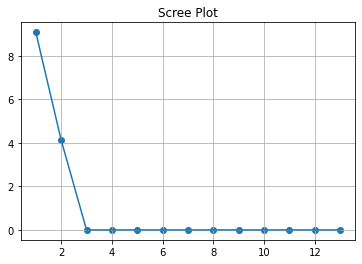

In [13]:
## Scree plot
fig, ax = plt.subplots()
plt.scatter(range(1,14),eigenvalues.real)
ax.plot(range(1,14), eigenvalues.real)
plt.grid()
ax.set_title("Scree Plot")

plt.show()

In [14]:
## Here we are taking two (2) components,
linear_discriminants = (eigenvectors[0 : 2]).real   # .real is used to ignore imaginary part data
linear_discriminants.shape

(2, 13)

<div class="alert-info"> Step 5: Obtaining new features by taking the dot product of the data and the matrix from Step 4. </div>

In [15]:
X_projected = np.dot(X, linear_discriminants.T)

X_projected.shape

(178, 2)

<div class="alert-info">  Plot the projected data, here we can see the dimension is reduced to 2 from original dimension 13 </div>

Shape of X: (178, 13)
Shape of transformed X: (178, 2)


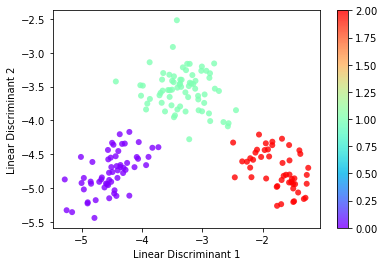

In [16]:
print("Shape of X:", X.shape)
print("Shape of transformed X:", X_projected.shape)

x1, x2 = X_projected[:, 0], X_projected[:, 1]

plt.scatter(x1, x2, c=y, edgecolor="none", alpha=0.8, cmap="rainbow")
# rainbow - plt.cm.get_cmap("viridis", 3)
plt.xlabel("Linear Discriminant 1")
plt.ylabel("Linear Discriminant 2")
plt.colorbar()
plt.show()